# Exploratory data analysis (EDA)
## Exploring Rossmann Pharmaceuticals' dataset 

## Importing the relevant libraries

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import warnings
warnings.filterwarnings('ignore')

In [2]:
#we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
import dvc.api

### Importing scripts & modules 

In [3]:
from helper import MyHelper
import utility
import plots

### Loading the data

In [4]:
train_PATH = "../data/train.csv"
test_PATH = "../data/test.csv"
store_PATH = "../data/store.csv"
sample_PATH = "../data/sample_submission.csv"

In [5]:
# the class has utility function we are going to use
Helper = MyHelper()

In [6]:
# we use our helper function to read csv data
df_train = Helper.read_csv(train_PATH)
df_test = Helper.read_csv(test_PATH)
df_store = Helper.read_csv(store_PATH)
df_sample = Helper.read_csv(sample_PATH)

>> file read as csv
>> file read as csv
>> file read as csv
>> file read as csv


# Inspecting the data

## 1. Train data

In [7]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
#Checking missing values 
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

## 2. Test data

In [9]:
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [10]:
#Checking missing values 
df_test.isnull().sum()

## WE CAN SEE THAT OPEN COLUMN HAS 11 missing vlaues

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

## 3. Store data

In [11]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
#Checking missing values 
df_store.isnull().sum()

# WE SEE THAT store has some missing vlaues

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## 4. Sample_submission data

In [13]:
df_sample.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


## Field Ddescriptions 

__Id__ - an Id that represents a (Store, Date) duple within the test set

__Store__ - a unique Id for each store

__Sales__ - the turnover for any given day (this is what you are predicting)

__Customers__ - the number of customers on a given day

__Open__ - an indicator for whether the store was open: 0 = closed, 1 = open

__StateHoliday__ - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

__SchoolHoliday__ - indicates if the (Store, Date) was affected by the closure of public schools

__StoreType__ - differentiates between 4 different store models: a, b, c, d

__Assortment__ - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here

__CompetitionDistance__ - distance in meters to the nearest competitor store

__CompetitionOpenSince[Month/Year]__ - gives the approximate year and month of the time the nearest competitor was opened

__Promo__ - indicates whether a store is running a promo on that day

__Promo2__ - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

__Promo2Since[Year/Week]__ - describes the year and calendar week when the store started participating in Promo2

__PromoInterval__ - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


# Merging 'train.csv' and 'store.csv'

## Both dataset have common column 'store' 
## We use that column to merge store into train dataset

In [14]:
train = pd.read_csv('../data/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("../data/store.csv", 
                    low_memory = False)

train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train['Dates']=train.apply(lambda x:'%s-%s-%s' % (x['Year'],x['Month'],x['Day']),axis=1)
train['Dates']=pd.to_datetime(train['Dates'])

train_store = pd.merge(train, store, how = 'inner', on = 'Store')

#data_frame = pd.read_csv("train.csv")
train = pd.read_csv('../data/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("../data/store.csv", 
                    low_memory = False)

train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,2013-01-05,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,2013-01-04,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,2013-01-03,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,2013-01-02,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# Data wrangling begins here..

 Descriptive statistics are very useful for initial exploration of the variables
 By default, only descriptives for the numerical variables are shown
 To include the categorical ones, you should specify this with an argument
 Note that categorical variables don't have some types of numerical descriptives
 and numerical variables don't have some types of categorical descriptives

In [15]:
#Checkinig the missing values
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
Dates                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [16]:
utility.percent_missing(train_store)

The dataset contains 9.71 % missing values.


In [17]:
train_store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


## Reading the description report 

### Sales

The __minimum sale__ is 0

The __maximum sale__ is 41551.00

25% of sale is below 3727.000

50% of sale is below 5744.000

75% of sale is below 7856.000

### Customers

The __minimum customer__ is 0

The __maximum customer__ is 7388

25% of customer is below 405

50% of customer is below 609

75% of customer is below 837

In [18]:
## Checking for duplicated rows
train_store.duplicated().sum()

0

## Dealing with missing value

In [19]:
utility.every_column_percent_missing(train_store)

,column_name,percent_missing
Store,Store,0.000000
Promo2,Promo2,0.000000
Assortment,Assortment,0.000000
StoreType,StoreType,0.000000
Dates,Dates,0.000000
WeekOfYear,WeekOfYear,0.000000
Month,Month,0.000000
Year,Year,0.000000
Day,Day,0.000000
StateHoliday,StateHoliday,0.000000


## Visual analysis 

## Days of the week distribution

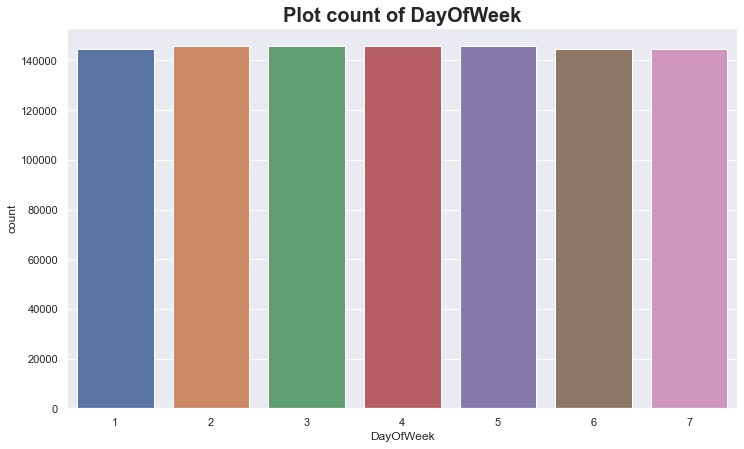

In [139]:
#Days of the week distribution using plot_count method
plots.plot_count(df_train,'DayOfWeek')

## Sales Distribution

## Exploring the probability distribution function - PDF


Text(0.5, 1.0, 'Sales Distribution')

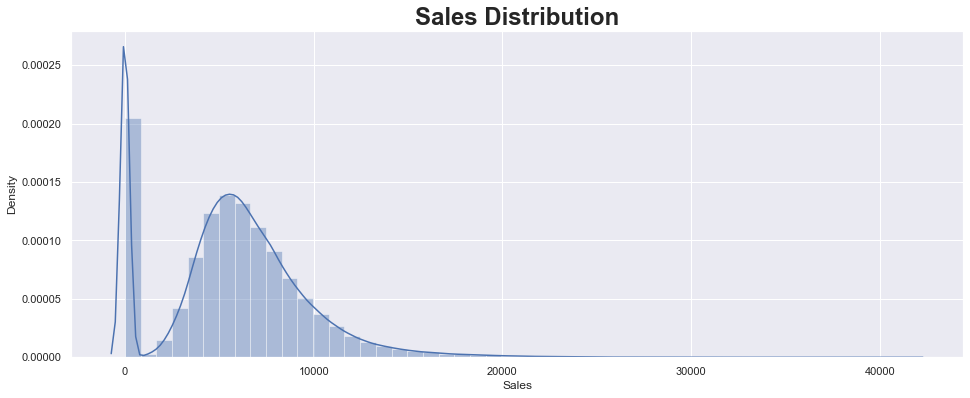

In [140]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
plt.figure(figsize=(16, 6))
sns.distplot(df_train['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

We can see that there are some outliers in sales distribuiton
let's check it with boxplot


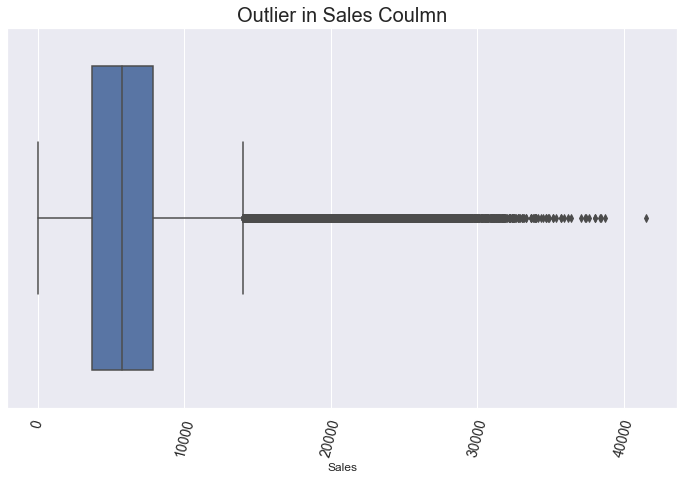

In [142]:
plots.plot_box(df_train, 'Sales','Outlier in Sales Coulmn')

and it is confirmed with boxplot. 

## Customers distribution

Text(0.5, 1.0, 'Customers Distribution')

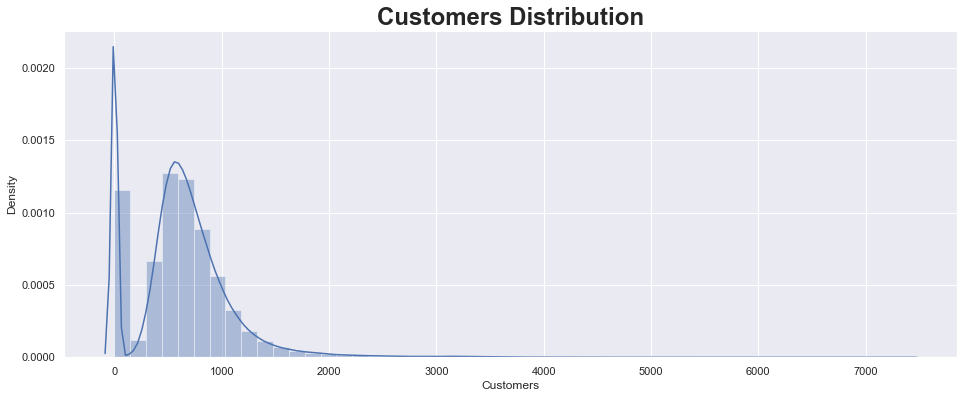

In [143]:
plt.figure(figsize=(16, 6))
sns.distplot(df_train['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

There is an outlier with customer aswell let's verify with box plot

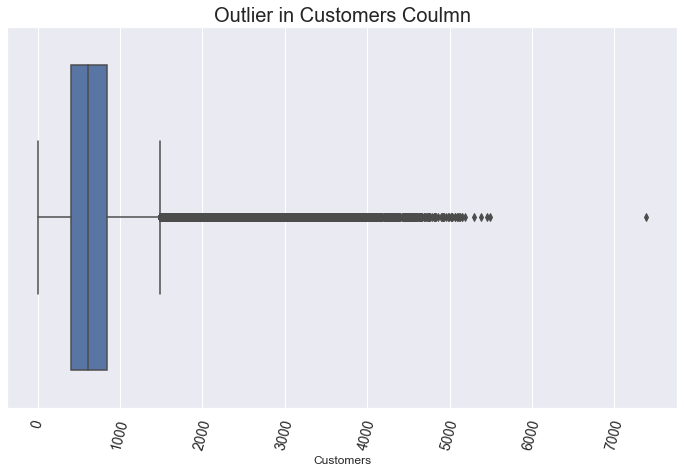

In [144]:
plots.plot_box(df_train, 'Customers','Outlier in Customers Coulmn')

## Open vs closed count

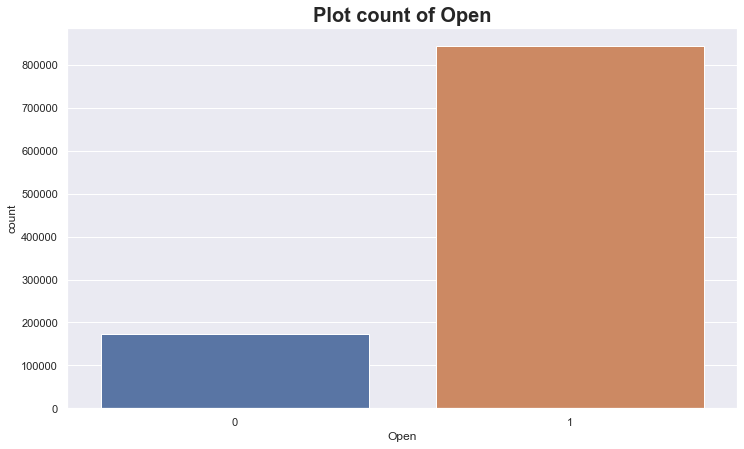

In [146]:
plots.plot_count(df_train, 'Open')

## Promo 

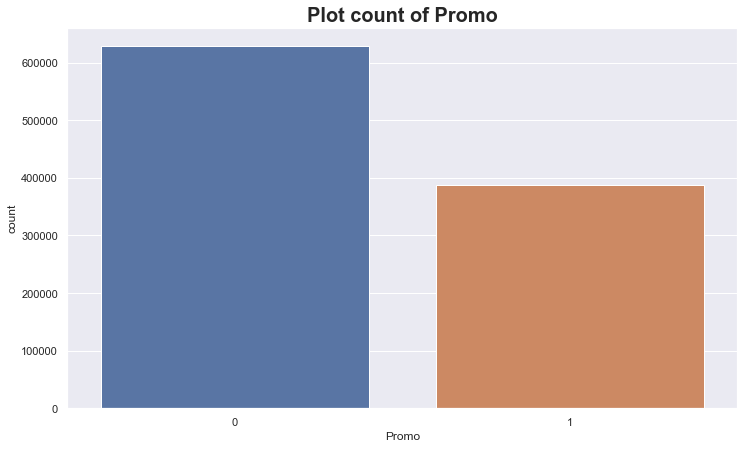

In [147]:
plots.plot_count(df_train, 'Promo')

## State Holiday 

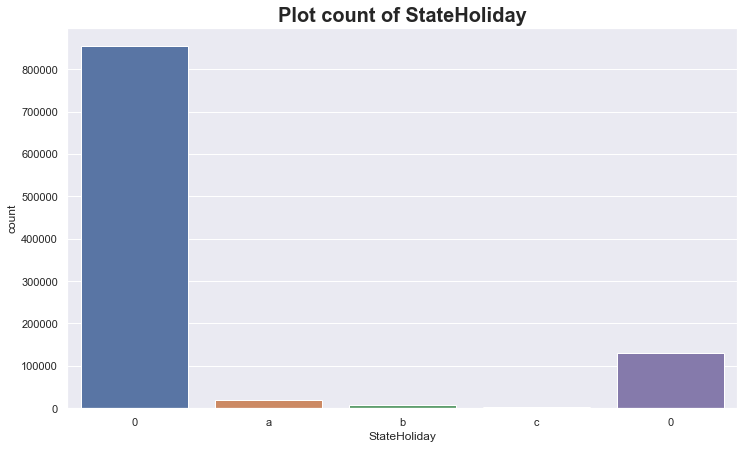

In [148]:
plots.plot_count(df_train, 'StateHoliday')

## School Holidays

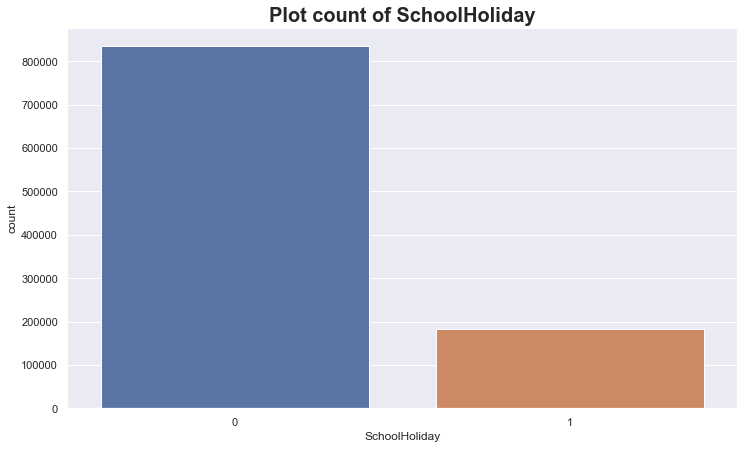

In [150]:
plots.plot_count(df_train, 'SchoolHoliday')

## Store distribution

<Figure size 648x504 with 0 Axes>

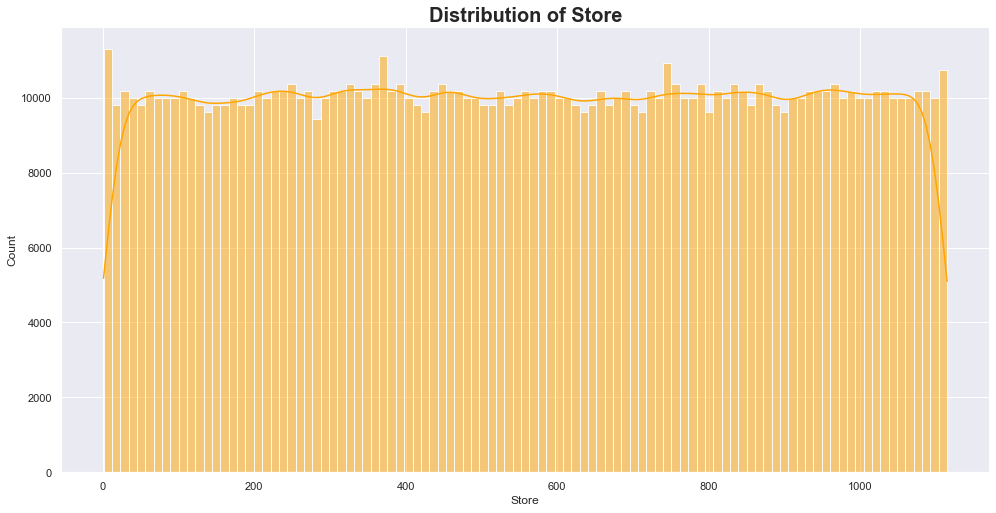

In [151]:
plots.plot_hist(df_train, 'Store', 'orange')

# Preprocessing 

## As we have identified there are outliers in 'sales' and 'customers' coulmn

## Dealing with outliers

In [24]:
q = df_train['Sales'].quantile(0.97)
q

13639.0

In [47]:
# Obviously there are some outliers present 

#We can deal with the problem easily by removing 0.5%, or 1% of the problematic samples

# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 97th percentile of the 'Sales' variable
q = df_train['Sales'].quantile(0.97)

# Then we can create a new df, with the condition that all prices must be below the 97 percentile of 'Sales'
data_1 = df_train[df_train['Sales']<q]

# In this way we have essentially removed the top 1% of the data about 'Sales'
data_1.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,986688.000000,986688.000000,986688,986688.000000,986688.000000,986688.000000,986688.000000,986688,986688.000000
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2013-12-25,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1114,NaN,NaN,NaN,NaN,827953,NaN
mean,557.829273,4.034002,NaN,5433.074977,593.143149,0.824851,0.370949,NaN,0.177131
std,323.013654,1.991702,NaN,3334.012233,390.016327,0.380094,0.483059,NaN,0.381780
min,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,278.000000,2.000000,NaN,3638.000000,395.000000,1.000000,0.000000,NaN,0.000000
50%,558.000000,4.000000,NaN,5637.000000,598.000000,1.000000,0.000000,NaN,0.000000
75%,840.000000,6.000000,NaN,7622.000000,811.000000,1.000000,1.000000,NaN,0.000000


Text(0.5, 1.0, 'Sales Distribution 97th Quantile')

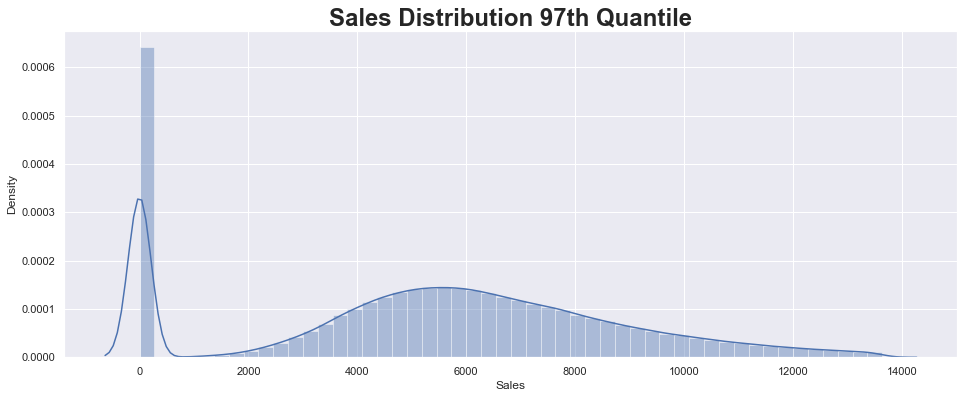

In [48]:
plt.figure(figsize=(16, 6))
sns.distplot(data_1['Sales']).set_title('Sales Distribution 97th Quantile',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

In [49]:
plots.plot_box(data_1, 'Sales','Outlier in Sales Coulmn')

NameError: name 'plots' is not defined

Text(0.5, 1.0, 'Customers Distribution 97th Quantile')

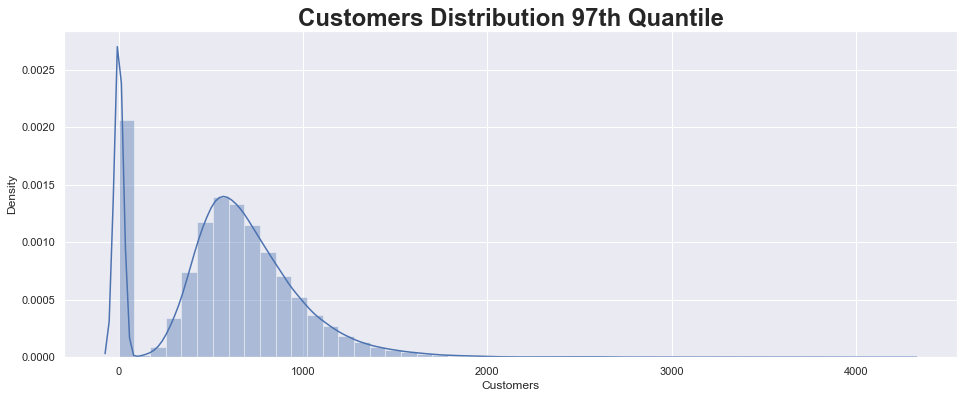

In [50]:
plt.figure(figsize=(16, 6))
sns.distplot(data_1['Customers']).set_title('Customers Distribution 97th Quantile',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

In [72]:
q = data_1['Sales'].quantile(0.1)
q

0.0

In [73]:
#Lets drop the least one percent or 0.1 quantile
q = data_1['Sales'].quantile(0.1)

data_1 = data_1[data_1['Sales']>q]


Text(0.5, 1.0, 'Customers Distribution')

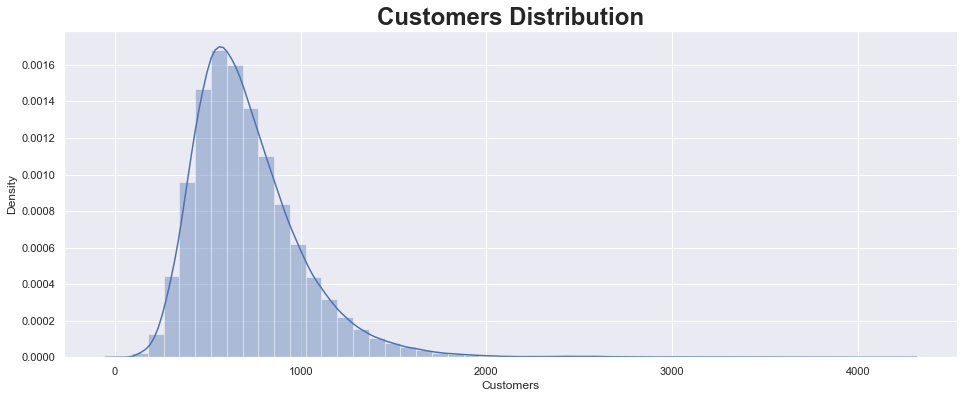

In [74]:
plt.figure(figsize=(16, 6))
sns.distplot(data_1['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

Text(0.5, 1.0, 'Sales Distribution')

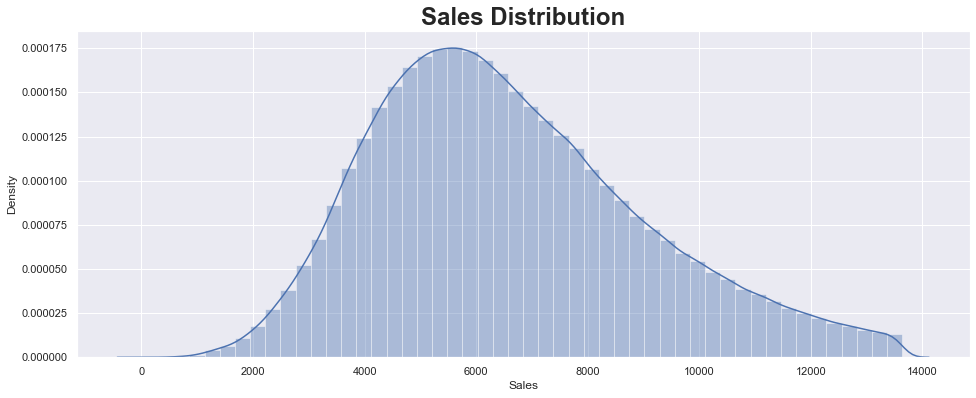

In [75]:
plt.figure(figsize=(16, 6))
# plt.title('add title here')
sns.distplot(data_1['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

In [83]:
data_1.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,813817.000000,813817.000000,813817,813817.000000,813817.000000,813817.0,813817.000000,813817,813817.000000
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2013-12-24,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1114,NaN,NaN,NaN,NaN,704174,NaN
mean,557.693059,3.545660,NaN,6587.168716,719.138601,1.0,0.435978,NaN,0.192300
std,323.064035,1.714392,NaN,2423.758360,306.294405,0.0,0.495884,NaN,0.394108
min,1.000000,1.000000,NaN,46.000000,8.000000,1.0,0.000000,NaN,0.000000
25%,278.000000,2.000000,NaN,4803.000000,513.000000,1.0,0.000000,NaN,0.000000
50%,558.000000,4.000000,NaN,6254.000000,663.000000,1.0,0.000000,NaN,0.000000
75%,840.000000,5.000000,NaN,8082.000000,862.000000,1.0,1.000000,NaN,0.000000


## Checking the OLS assumptions

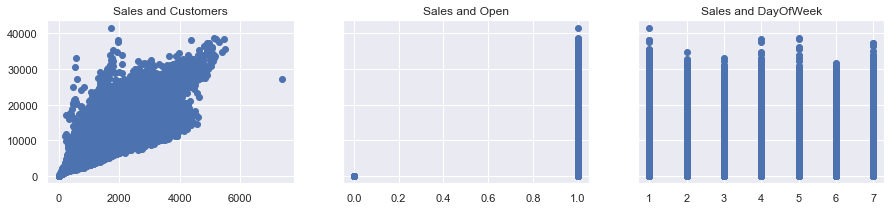

In [179]:
#Here Sales is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Sales' as y
ax1.scatter(df_train['Customers'],df_train['Sales'])
ax1.set_title('Sales and Customers')
ax2.scatter(df_train['Open'],df_train['Sales'])
ax2.set_title('Sales and Open')
ax3.scatter(df_train['DayOfWeek'],df_train['Sales'])
ax3.set_title('Sales and DayOfWeek')


plt.show()

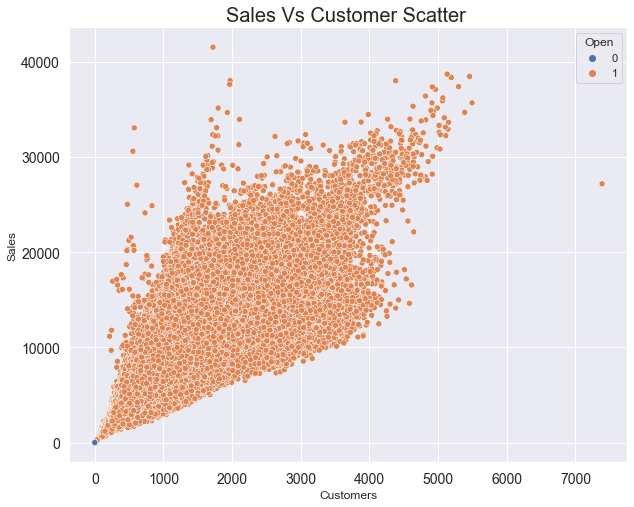

In [185]:
plots.plot_scatter(df_train, 'Customers','Sales', 'Sales Vs Customer Scatter ','Open', None)

# Merging train and store

Text(0.5, 1.0, 'Sales Distribution')

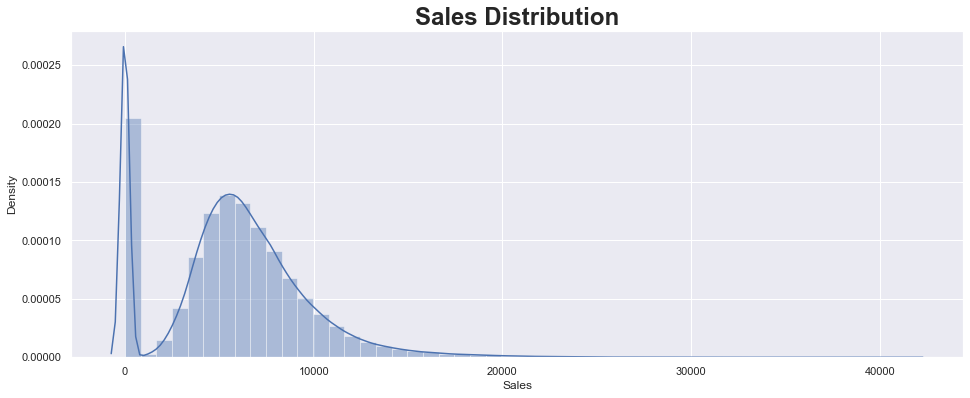

In [82]:
plt.figure(figsize=(16, 6))
sns.distplot(train_store['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

In [203]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 18, 8

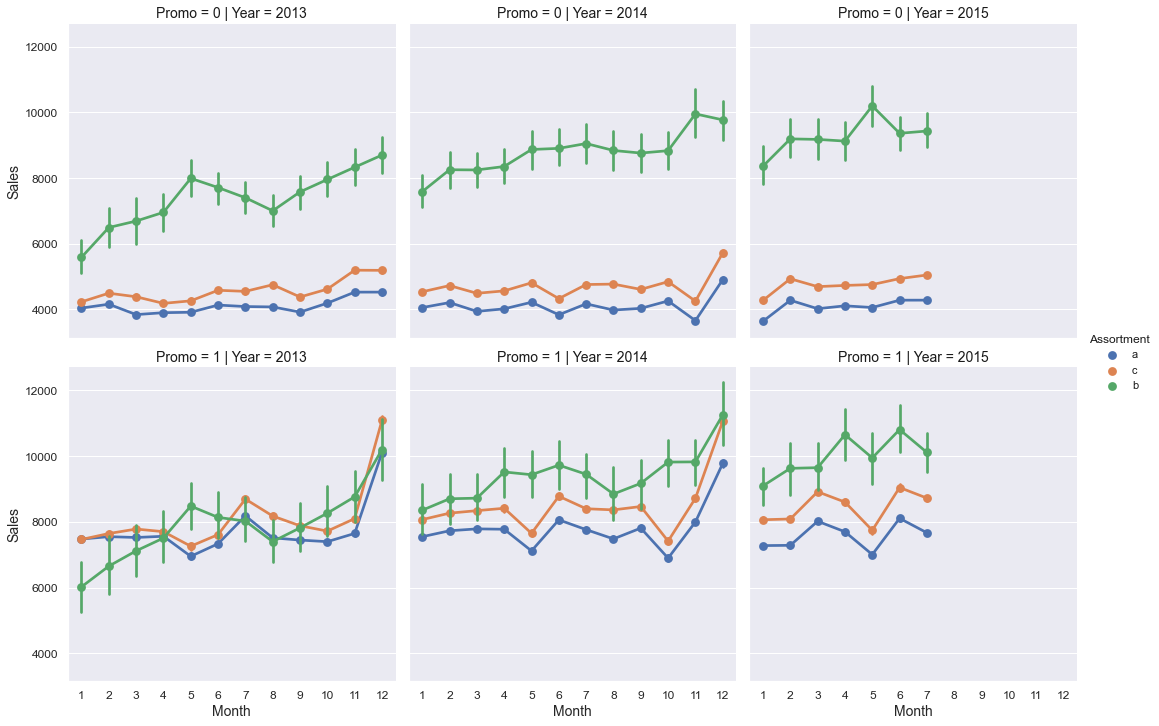

In [204]:
sns.factorplot(data = train_store, x ="Month", y = "Sales", 
               col = 'Year', # per store type in cols
               hue = 'Assortment',
               row='Promo'
              )

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

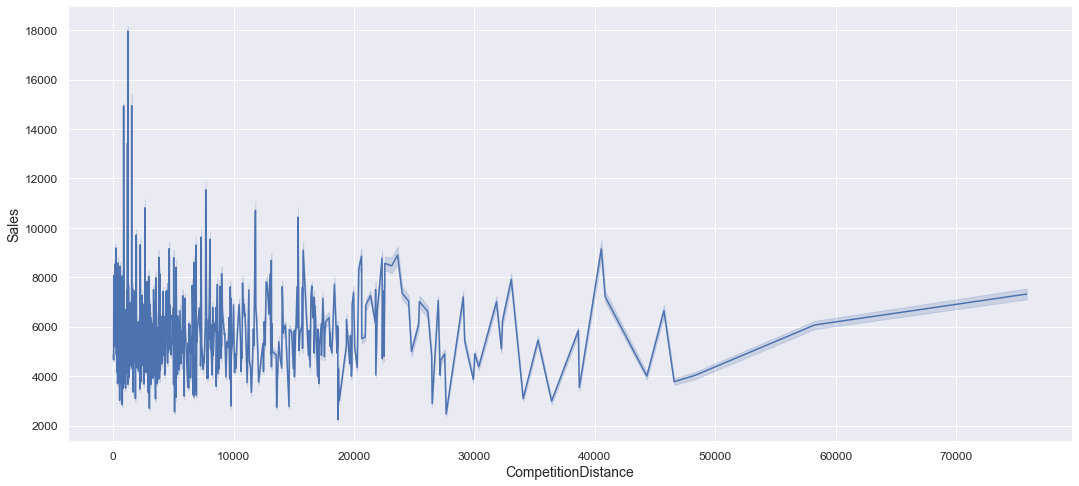

In [205]:
sns.lineplot(x="CompetitionDistance", y="Sales", data=train_store)
